In [719]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import seaborn as sns
import re
from os import path
from glob import glob
from tqdm import tqdm
import numpy as np
from matplotlib import cm
from pprint import pprint

In [677]:
ROOT_PATH = '\\\\CILab_NAS_Data/homes/inchang/PuzzlePCG/ProxyPlayer'

In [678]:
files = glob(path.join(ROOT_PATH, '*', 'MatchResult_*.csv'))


In [679]:
StatisticsColumns = [
    'ReachedKnowledgeStep', 'AlmostReachedKnowledgeStep',
    'Matched_HorizontalPiece', 'Matched_VerticalPiece', 'Matched_CrossPiece', 'Matched_RocketPiece', 'Matched_BombPiece', 'Matched_RainbowPiece']

In [680]:
def parse_filename(data):
    result = dict()
    for i in range(0, len(data), 2):
        result[data[i]] = data[i+1]
    return result

In [681]:
dfs = []
for file_path in tqdm(files):
    # print(file_path)
    file_name = path.basename(file_path)

    _file_name = file_name.split('_')[1:-1]
    args = parse_filename(_file_name)

    df = pd.read_csv(file_path)

    for key, value in args.items():
        df[key] = value
    dfs.append(df)

original_df = pd.concat(dfs)

original_df['Sum_Matched'] = original_df['Matched_HorizontalPiece'] + original_df['Matched_HorizontalPiece'] + original_df['Matched_HorizontalPiece']  + \
    original_df['Matched_HorizontalPiece'] + original_df['Matched_HorizontalPiece'] + original_df['Matched_HorizontalPiece']
original_df.loc[original_df['method'] == 'random', 'simulation'] = 0

original_df['simpleEffect'] = original_df['simpleEffect'].replace(np.nan, 0)
original_df['objective'] = original_df['objective'].replace(np.nan, '-')

100%|██████████| 30/30 [00:01<00:00, 16.19it/s]


In [682]:
original_df.head()

,EpisodeCount,StepCount,Time,InstanceUUID,SettleCount,ChangedCount,MeanComparisonCount,StdComparisonCount,ReachedKnowledgeStep,AlmostReachedKnowledgeStep,...,Target_RocketPiece,Target_BombPiece,Target_RainbowPiece,method,player,simpleEffect,objective,simulation,almostRatio,Sum_Matched
0,1,300,2023-05-16 12:47:26.044,06c6c84a,0,209,0.826667,0.661878,277,174,...,2,2,3,mcts,0,1,knowledge,100,0.75,534
1,2,301,2023-05-16 12:48:40.894,06c6c84a,0,224,0.933555,0.679880,56,56,...,2,2,3,mcts,0,1,knowledge,100,0.75,414
2,3,300,2023-05-16 12:49:57.647,06c6c84a,0,230,0.900000,0.609293,109,93,...,2,2,3,mcts,0,1,knowledge,100,0.75,480
3,4,300,2023-05-16 12:51:09.409,06c6c84a,0,196,0.763333,0.654791,175,70,...,2,2,3,mcts,0,1,knowledge,100,0.75,456
4,5,300,2023-05-16 12:52:26.411,06c6c84a,0,203,0.863333,0.730136,63,63,...,2,2,3,mcts,0,1,knowledge,100,0.75,432


In [683]:
match_result = original_df.groupby(['method', 'objective', 'simulation'])['Matched_HorizontalPiece',
                                      'Matched_VerticalPiece',
                                      'Matched_CrossPiece',
                                      'Matched_RocketPiece',
                                      'Matched_BombPiece',
                                      'Matched_RainbowPiece',
                                      'AlmostReachedKnowledgeStep', 'ReachedKnowledgeStep',
                                      'Sum_Matched'].agg(
    {
        'AlmostReachedKnowledgeStep': ['mean'],
        'ReachedKnowledgeStep': ['mean'],
        'Matched_HorizontalPiece':['mean', 'count'],
        'Matched_VerticalPiece':['mean'],
        'Matched_CrossPiece':['mean'],
        'Matched_RocketPiece':['mean'],
        'Matched_BombPiece':['mean'],
        'Matched_RainbowPiece':['mean'],
        'Sum_Matched':['mean'],
     }
)
match_result

C:\Users\GIST\.conda\envs\mlagents\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


AlmostReachedKnowledgeStep ReachedKnowledgeStep  \
                                                  mean                 mean   
method objective simulation                                                   
mcts   knowledge 100                        105.261957           117.885926   
                 200                        101.798623           114.826449   
                 400                        100.864170           113.865440   
       score     100                         89.001666           117.746807   
                 200                         89.327859           118.145377   
                 400                         86.168635           114.420604   
random -         0                          115.677068           129.980188   

                            Matched_HorizontalPiece        \
                                               mean count   
method objective simulation                                 
mcts   knowledge 100                      74.957394  3638   
                 200                      77.490820  3486   
                 400                      79.543637  3151   
       score     100                      74.947807  1801   
                 200                      77.579684  1644   
                 400                      79.525591  1524   
random -         0                        45.854879  2019   

                            Matched_VerticalPiece Matched_CrossPiece  \
                                             mean               mean   
method objective simulation                                            
mcts   knowledge 100                    55.654480          10.724574   
                 200                    57.163511          11.176420   
                 400                    58.666138          11.733735   
       score     100                    55.725708          10.706830   
                 200                    57.812044          11.181265   
                 400                    58.488189          11.354331   
random -         0                      31.934126           6.028727   

                            Matched_RocketPiece Matched_BombPiece  \
                                           mean              mean   
method objective simulation                                         
mcts   knowledge 100                 122.844695          8.989830   
                 200                 125.989099          9.300344   
                 400                 128.076484          9.754998   
       score     100                 122.570794          8.995003   
                 200                 126.430049          9.357664   
                 400                 127.265092          9.553150   
random -         0                    83.396236          5.639425   

                            Matched_RainbowPiece Sum_Matched  
                                            mean        mean  
method objective simulation                                   
mcts   knowledge 100                   12.373007  449.744365  
                 200                   12.895295  464.944923  
                 400                   13.263726  477.261822  
       score     100                   12.146585  449.686841  
                 200                   12.796837  465.478102  
                 400                   13.288714  477.153543  
random -         0                      8.032194  275.129272

In [684]:
def get_legend_name(x):
    if x['method'] == 'mcts':
        if x['objective'] == 'score':
            return f"{x['method']}_{x['objective']}_{x['simulation']}"
        elif x['objective'] == 'knowledge':
            return f"{x['method']}_{x['objective']}_{x['almostRatio']}_{x['simulation']}"
    else:
        return f"{x['method']}"

{'mcts_knowledge_0.75_100',
 'mcts_knowledge_0.75_200',
 'mcts_knowledge_0.75_400',
 'mcts_knowledge_1.0_100',
 'mcts_knowledge_1.0_200',
 'mcts_knowledge_1.0_400',
 'mcts_score_100',
 'mcts_score_200',
 'mcts_score_400',
 'random'}


(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'r_step'),
  Text(1, 0, 'ar_step'),
  Text(2, 0, 'b0'),
  Text(3, 0, 'b1'),
  Text(4, 0, 'b2'),
  Text(5, 0, 'b3'),
  Text(6, 0, 'b4'),
  Text(7, 0, 'b5')])

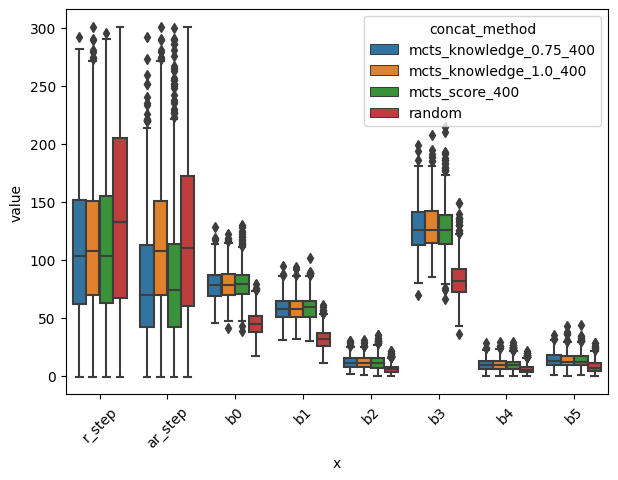

In [729]:
melted_df = original_df.copy()

melted_df = melted_df.groupby(['method', 'objective', 'simulation']).sample(n=1000, random_state=1)
melted_df['concat_method'] = melted_df.agg(lambda x: get_legend_name(x), axis=1)
pprint(set(melted_df['concat_method']))
# Display Target
melted_df = melted_df[melted_df['concat_method'].isin(['random', 'mcts_knowledge_1.0_400', 'mcts_knowledge_0.75_400', 'mcts_score_400'])]

plt.figure(figsize=(7, 5))
melted_df = pd.melt(melted_df, id_vars=['EpisodeCount', 'objective', 'concat_method', 'simulation'],
                    value_vars=[*StatisticsColumns], ignore_index=False)
# melted_df['x'] = 'sf' + melted_df['simpleEffect'].astype(str) + '_' + melted_df['variable']
melted_df['x'] = melted_df['variable']
melted_df['x'] = melted_df['x'].str.replace('AlmostReachedKnowledgeStep', 'ar_step')
melted_df['x'] = melted_df['x'].str.replace('ReachedKnowledgeStep', 'r_step')

melted_df['x'] = melted_df['x'].str.replace('Matched_HorizontalPiece', 'b0')
melted_df['x'] = melted_df['x'].str.replace('Matched_VerticalPiece', 'b1')
melted_df['x'] = melted_df['x'].str.replace('Matched_CrossPiece', 'b2')
melted_df['x'] = melted_df['x'].str.replace('Matched_RocketPiece', 'b3')
melted_df['x'] = melted_df['x'].str.replace('Matched_BombPiece', 'b4')
melted_df['x'] = melted_df['x'].str.replace('Matched_RainbowPiece', 'b5')


ax = sns.boxplot(x="x", y="value", hue="concat_method", data=melted_df)
plt.xticks(rotation=45)

In [ ]:
)